In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import glob

# search all files inside a specific folder
# *.* means file name with any extension
dir_path = r'Data/Consumers/processed/*'
res = glob.glob(dir_path)

In [209]:
dict_df={}
sel_col=['States_UTs','Total']
for files in res:
    yr=files[-8:-4]
    
    dict_df[yr]=pd.read_csv(files,usecols=sel_col)
    print(files[-8:-4])

2014
2015
2016
2017
2020
2021


In [210]:
dict_df['2014']['States_UTs'][0]

'Andaman and Nicobar Islands'

In [211]:
temp={}
for key, value_df in dict_df.items():
    temp[key]=value_df.shape[0]
key_max = max(temp, key=temp.get)

del temp[key_max]
temp_df=pd.DataFrame()
temp_df['States/UTs']=dict_df[key_max]['States_UTs']
temp_df[key_max]=dict_df[key_max]['Total']

for key,value in temp.items():
    temp_df=pd.merge(temp_df,dict_df[key],left_on='States/UTs',right_on='States_UTs',how='left')
    temp_df=temp_df.drop('States_UTs',axis=1)
    temp_df=temp_df.rename(columns={'Total':key})

temp_df['2018']=np.NaN
temp_df['2019']=np.NaN

order=['States/UTs','2014','2015','2016','2017','2018','2019','2020','2021']
temp_df=temp_df[order]

In [207]:
temp_df

,States/UTs,2014,2015,2016,2017,2018,2019,2020,2021
0,Andaman and Nicobar Islands,117046.0,119743.0,119743,123027.0,NaN,NaN,NaN,141738.0
1,Andhra Pradesh,22784817.0,16230466.0,16992222,17295399.0,NaN,NaN,19130319.0,19315258.0
2,Arunachal Pradesh,NaN,215271.0,215271,213749.0,NaN,NaN,NaN,234398.0
3,Assam,2921452.0,3301591.0,3592243,4029328.0,NaN,NaN,5901579.0,5901579.0
4,Bihar,4132442.0,4132442.0,4132442,10295411.0,NaN,NaN,15877310.0,16973233.0
5,Chandigarh,NaN,NaN,216896,NaN,NaN,NaN,234629.0,254413.0
6,Chhattisgarh,4041595.0,4294606.0,4517450,4743151.0,NaN,NaN,5759002.0,5906689.0
7,Dadra and Nagar Haveli,NaN,65182.0,66658,70300.0,NaN,NaN,NaN,82963.0
8,Daman and Diu,56135.0,57704.0,59138,60180.0,NaN,NaN,NaN,63404.0
9,Delhi,4856035.0,5057849.0,5336540,NaN,NaN,NaN,6241987.0,6412472.0


In [202]:
yearly_Cons_df=temp_df.set_index('States/UTs')
yearly_Cons_df=yearly_Cons_df.T

In [186]:
yearly_Cons_df

States/UTs,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Delhi,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
2014,119743.0,16230466.0,215271.0,3301591.0,4132442.0,NaN,4294606.0,65182.0,57704.0,5057849.0,...,430088.0,8340442.0,12170509.0,93103.0,26469436.0,12367458.0,NaN,16483434.0,1890692.0,18083012.0
2015,119743.0,16230466.0,215271.0,3301591.0,4132442.0,NaN,4294606.0,65182.0,57704.0,5057849.0,...,430088.0,8340442.0,12170509.0,93103.0,26469436.0,12367458.0,NaN,16483434.0,1890692.0,18083012.0
2016,119743,16992222,215271,3592243,4132442,216896,4517450,66658,59138,5336540,...,442072,8590146,12990038,93103,26665722,12315172,642999,16483434,1989385,19454875
2017,119743.0,16230466.0,215271.0,3301591.0,4132442.0,NaN,4294606.0,65182.0,57704.0,5057849.0,...,430088.0,8340442.0,12170509.0,93103.0,26469436.0,12367458.0,NaN,16483434.0,1890692.0,18083012.0
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,119743.0,16230466.0,215271.0,3301591.0,4132442.0,NaN,4294606.0,65182.0,57704.0,5057849.0,...,430088.0,8340442.0,12170509.0,93103.0,26469436.0,12367458.0,NaN,16483434.0,1890692.0,18083012.0
2021,119743.0,16230466.0,215271.0,3301591.0,4132442.0,NaN,4294606.0,65182.0,57704.0,5057849.0,...,430088.0,8340442.0,12170509.0,93103.0,26469436.0,12367458.0,NaN,16483434.0,1890692.0,18083012.0


ValueError: Unable to parse string "119743 " at position 2

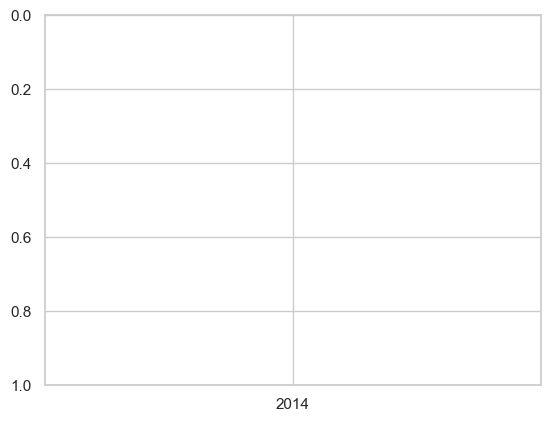

In [208]:
sns.lineplot(data=yearly_Cons_df,x=yearly_Cons_df.index,y='Andaman and Nicobar Islands')

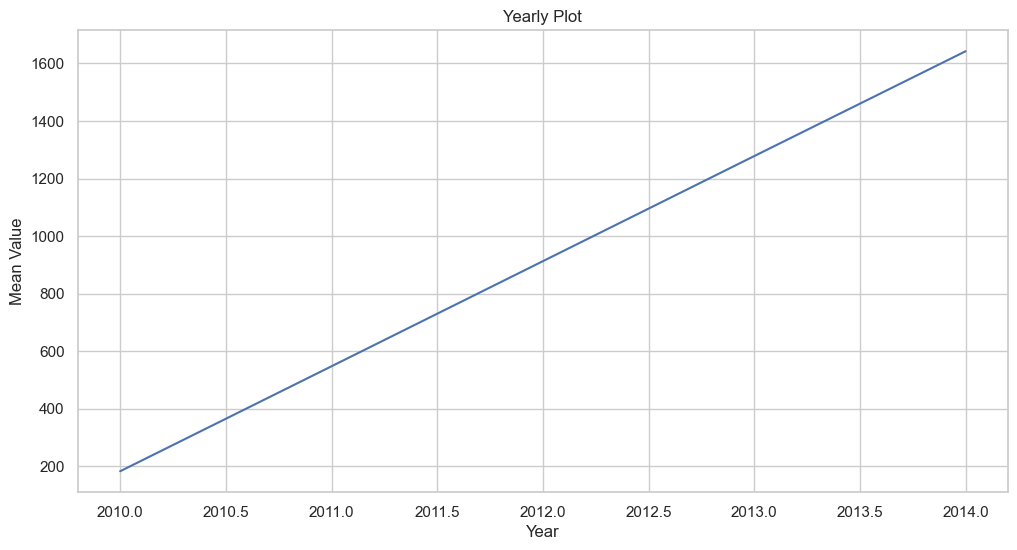

In [175]:
# Sample DataFrame
data = {'Date': pd.date_range(start='2010-01-01', periods=365*5, freq='D'),
        'Value': [i for i in range(365*5)]}
df = pd.DataFrame(data)

# Set the Date column as the DataFrame index
df.set_index('Date', inplace=True)

# Resample to yearly frequency and calculate the mean value for each year
yearly_data = df.resample('Y').mean()

# Create the yearly plot using Seaborn
sns.set(style='whitegrid')  # Optional: set the style
plt.figure(figsize=(12, 6))  # Optional: adjust the figure size
sns.lineplot(data=yearly_data, x=yearly_data.index.year, y='Value')
plt.title('Yearly Plot')
plt.xlabel('Year')
plt.ylabel('Mean Value')

# Show the plot
plt.show()

In [144]:
temp_df

,2016,States_UTs,Total
0,Andaman and Nicobar Islands,Andaman and Nicobar Islands,119743.0
1,Andhra Pradesh,Andhra Pradesh,16230466.0
2,Arunachal Pradesh,Arunachal Pradesh,215271.0
3,Assam,Assam,3301591.0
4,Bihar,Bihar,4132442.0
5,Chandigarh,NaN,NaN
6,Chhattisgarh,Chhattisgarh,4294606.0
7,Dadra and Nagar Haveli,Dadra and Nagar Haveli,65182.0
8,Daman and Diu,Daman and Diu,57704.0
9,Delhi,Delhi,5057849.0


In [113]:
temp_df=pd.DataFrame()
temp_df[key_max]=dict_df[key_max]['States_UTs']
temp_df['2021']=dict_df['2021']['States_UTs']
temp_df['y/n']=temp_df[key_max]==temp_df['2021']

In [118]:
temp_df.iloc[0]['2016']

'Andaman\xa0and\xa0Nicobar\xa0Islands'

In [82]:
dict_df['2020'].shape

(37, 11)